# Exercise 01

Build a regression model with the `boston_house` dataset here

```
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's  (THIS IS THE TARGET)
```

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT"
]

In [15]:
# Suggestion: First build a DataFrame incorporation column names...
X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name="MEDV")
data = pd.concat([X, y], axis=1)

# **Let's go**

In [88]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Some EDA

### Basic checks on data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Correlation matrix

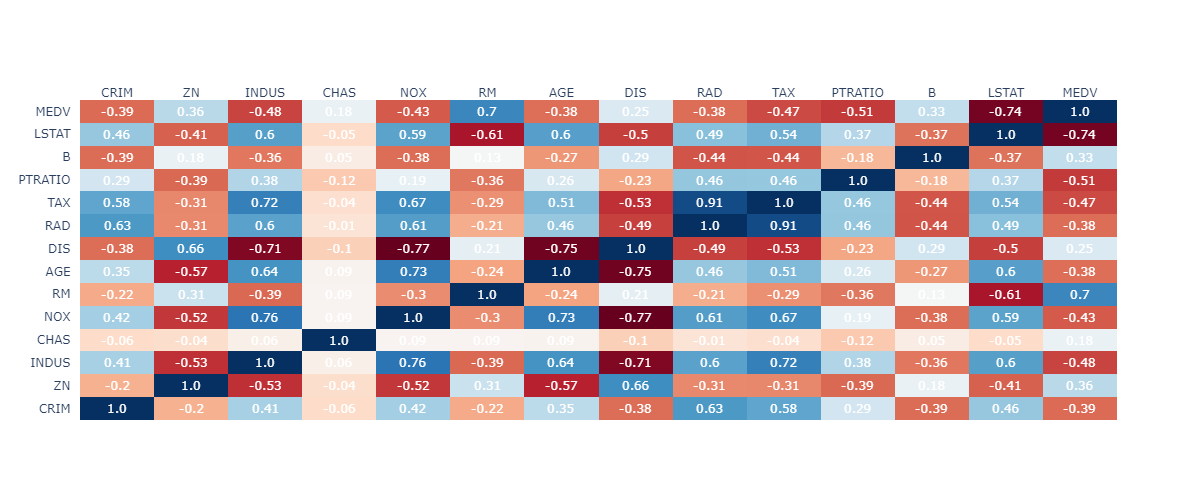

In [28]:
df_corr = data.corr()
xx = list(df_corr.columns)
yy = list(df_corr.index)
zz = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    zz,
    x = xx,
    y = yy ,
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=500
)

### Scatter matrix

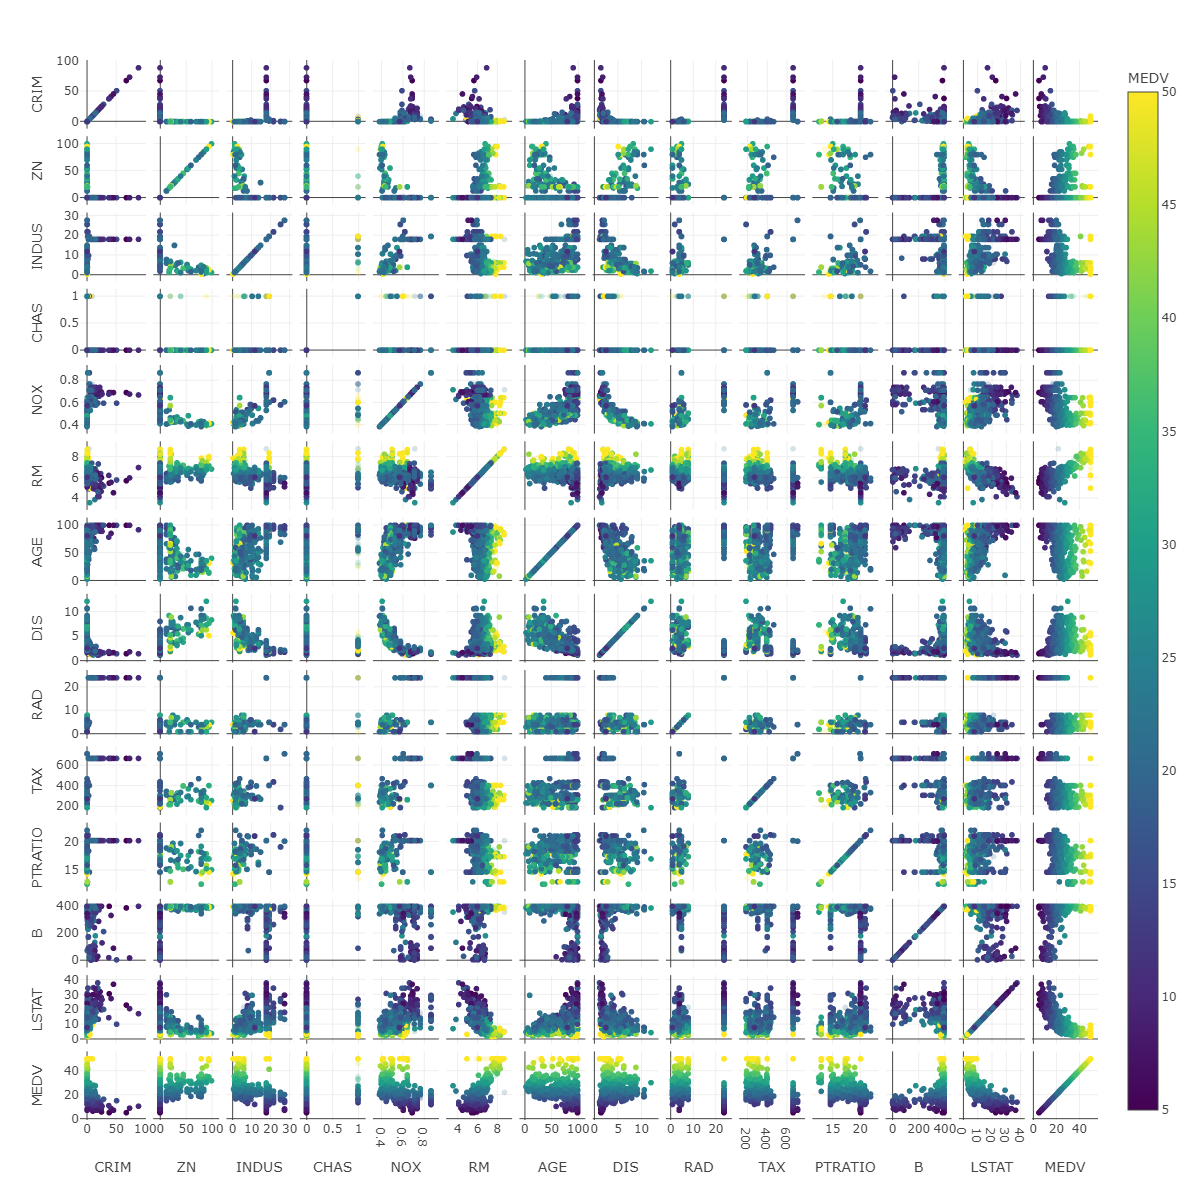

In [29]:
px.scatter_matrix(data, color="MEDV", height=1200, template="none")

## Preprocessing

### Train/Test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scale data

In [37]:
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

### **Linear Regression**

In [102]:
from sklearn.linear_model import LinearRegression

#### Model definition

In [103]:
clf = LinearRegression()

#### Fit model to data

In [104]:
clf.fit(
    X_train_sc,         # Features
    y_train          # Target
)

LinearRegression()

#### Make predictions over new data

In [105]:
y_test_pred = clf.predict(X_test_sc)          # This is the hard output

In [107]:
y_train_pred = clf.predict(X_train_sc)  

#### Calculate score

In [108]:
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)} %")

R2: 0.7788799778687787
MSE: 16.895857911450765
MAE: 2.951928994230657
MAPE: 0.1531279392265638 %


In [109]:
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)} %")

R2: 0.6593563352861558
MSE: 35.00563978664465
MAE: 3.7909767538134553
MAPE: 0.16489025429730858 %


#### Plot the residuals

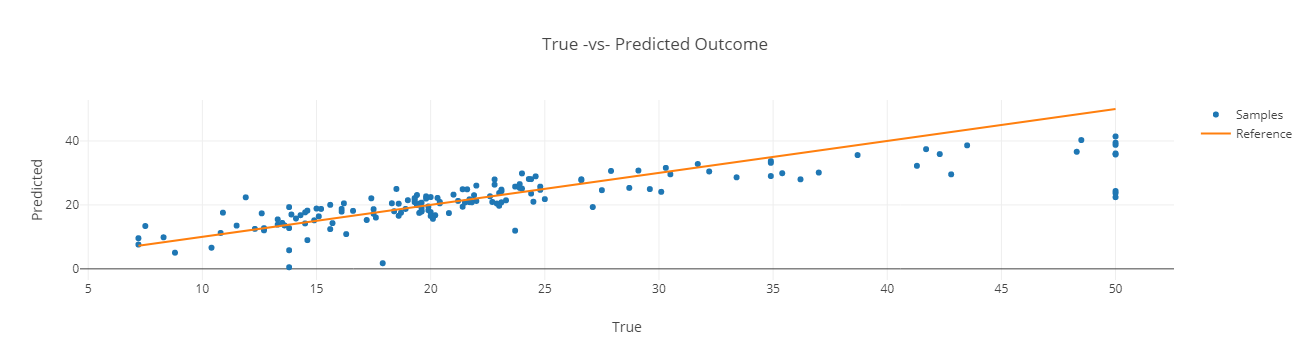

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test_pred,
    mode="markers",
    name="Samples"
))
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test.values,
    mode="lines",
    name="Reference"
))
fig.update_layout(title="True -vs- Predicted Outcome", xaxis_title="True", yaxis_title="Predicted", template="none")

### **Polynomial Regression**

In [111]:
from sklearn.preprocessing import PolynomialFeatures

#### Model definition

In [112]:
clf = LinearRegression()
prep = PolynomialFeatures(
    degree=2        # specifies the maximal degree of the polynomial features
)

#### Preprocess features

In [113]:
X_train_poly = prep.fit_transform(X_train_sc)

In [114]:
X_train_poly

array([[ 1.        , -0.41338758,  0.97878852, ...,  0.18707967,
        -0.31747091,  0.53874254],
       [ 1.        , -0.41472205, -0.50223052, ...,  0.12041624,
        -0.29384582,  0.71705746],
       [ 1.        , -0.34550934,  0.39535678, ...,  0.14126927,
        -0.31012041,  0.68078973],
       ...,
       [ 1.        , -0.36076638,  0.39535678, ...,  0.10115504,
        -0.30795747,  0.93754897],
       [ 1.        ,  0.01136192, -0.50223052, ...,  0.1362575 ,
         0.03547842,  0.00923779],
       [ 1.        , -0.02004629, -0.50223052, ...,  0.15388144,
         0.09953896,  0.06438726]])

#### Fit model to data

In [115]:
clf.fit(
    X_train_poly,         # Features
    y_train          # Target
)

LinearRegression()

#### Make predictions over new data

In [116]:
X_test_poly = prep.transform(X_test_sc)
y_test_pred = clf.predict(X_test_poly)          # This is the hard output

In [117]:
y_train_pred = clf.predict(X_train_poly)  

#### Calculate score

In [118]:
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)} %")

R2: 0.9443922961422659
MSE: 4.249004021014198
MAE: 1.6011018052612995
MAPE: 0.08455044110525055 %


In [119]:
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)} %")

R2: 0.810342026342689
MSE: 19.48986403164111
MAE: 2.8511204769736844
MAPE: 0.13489613049405863 %


#### Plot residuals

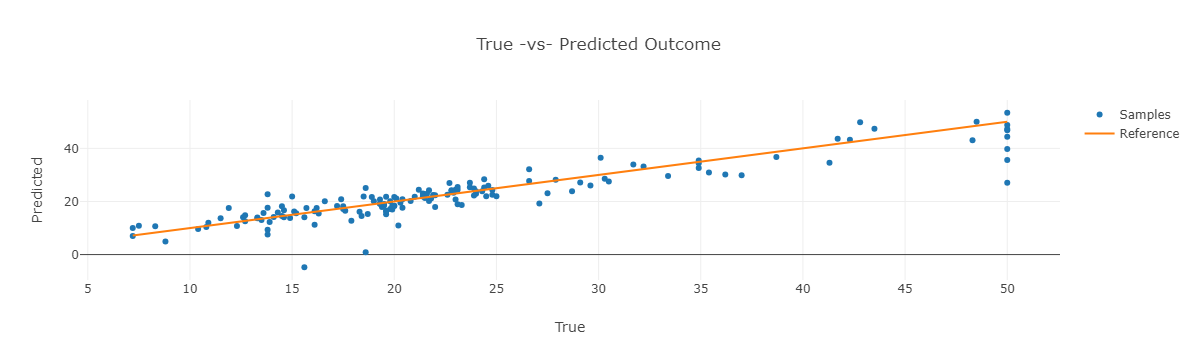

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test_pred,
    mode="markers",
    name="Samples"
))
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test.values,
    mode="lines",
    name="Reference"
))
fig.update_layout(title="True -vs- Predicted Outcome", xaxis_title="True", yaxis_title="Predicted", template="none")

### **Decision Tree Regressor**

In [134]:
from sklearn.tree import DecisionTreeRegressor

#### Model definition

In [135]:
reg = DecisionTreeRegressor(
    criterion="squared_error", # function to measure the quality of a split
    max_depth=None,            # The maximum number of levels (depth) of the resulting tree. The more depth, the more complex (and the more risk of overfitting)
    min_samples_split=2,       # The minimum number of samples if a leaf to promote for splitting. The smaller this number, the more complex (and the more risk of overfitting)
    min_samples_leaf=1,        # The minimum number of samples in a terminal leaf of any branch. The smaller this number, the more complex (and the more risk of overfitting)
)

#### Fit model to data

In [136]:
reg.fit(
    X_train,         # Features
    y_train          # Target
)

DecisionTreeRegressor()

#### Make predictions over new data

In [137]:
y_test_pred = reg.predict(X_test)          # This is the hard output

In [138]:
y_train_pred = reg.predict(X_train)  

#### Calculate score

In [139]:
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)} %")

R2: 1.0
MSE: 0.0
MAE: 0.0
MAPE: 0.0 %


In [140]:
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)} %")

R2: 0.7515705721637584
MSE: 25.52940789473684
MAE: 3.15328947368421
MAPE: 0.13942304941530947 %


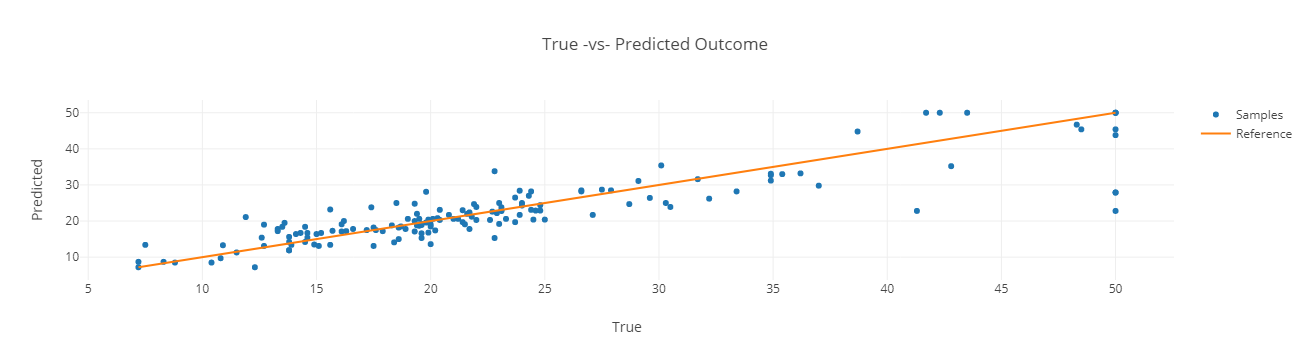

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test_pred,
    mode="markers",
    name="Samples"
))
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test.values,
    mode="lines",
    name="Reference"
))
fig.update_layout(title="True -vs- Predicted Outcome", xaxis_title="True", yaxis_title="Predicted", template="none")

### **Random Forest Regressor**

In [149]:
from sklearn.ensemble import RandomForestRegressor

#### Model definition

In [156]:
reg = RandomForestRegressor(
    n_estimators=1000,
    max_depth=5
)

#### Fit model to data

In [157]:
reg.fit(
    X_train,         # Features
    y_train          # Target
)

RandomForestRegressor(max_depth=5, n_estimators=1000)

#### Make predictions over new data

In [158]:
y_test_pred = reg.predict(X_test)          # This is the hard output

In [159]:
y_train_pred = reg.predict(X_train)  

#### Calculate score

In [160]:
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)} %")

R2: 0.9383091846219968
MSE: 4.713816691144011
MAE: 1.671364178836225
MAPE: 0.08942443100329577 %


In [161]:
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)} %")

R2: 0.8041659328642274
MSE: 20.12453928320432
MAE: 2.6015206274272167
MAPE: 0.11525630665623861 %


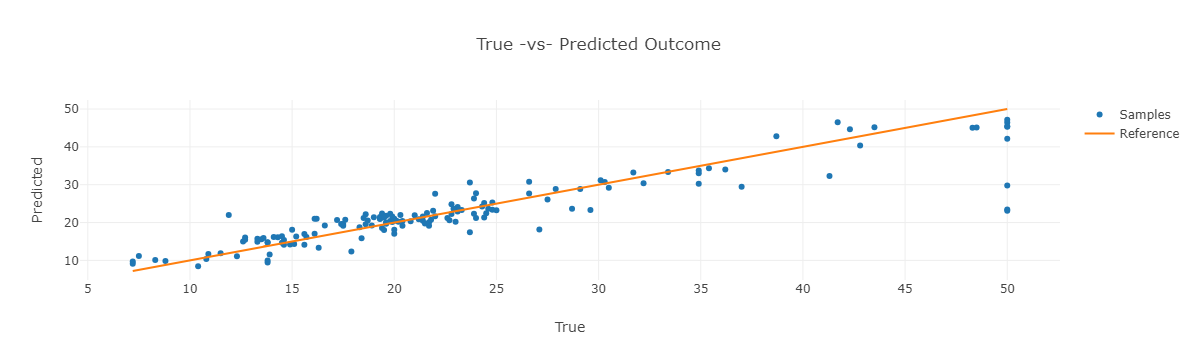

In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test_pred,
    mode="markers",
    name="Samples"
))
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test.values,
    mode="lines",
    name="Reference"
))
fig.update_layout(title="True -vs- Predicted Outcome", xaxis_title="True", yaxis_title="Predicted", template="none")

### **Gradient Boosting Regressor**

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

#### Model definition

In [194]:
reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1
)

#### Fit model to data

In [195]:
reg.fit(
    X_train,         # Features
    y_train          # Target
)

GradientBoostingRegressor()

#### Make predictions over new data

In [196]:
y_test_pred = reg.predict(X_test)          # This is the hard output

In [197]:
y_train_pred = reg.predict(X_train)  

#### Calculate score

In [198]:
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)} %")

R2: 0.9794902185312064
MSE: 1.5671595459862828
MAE: 0.988860847371733
MAPE: 0.05333967727834692 %


In [199]:
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)} %")

R2: 0.8669657648616302
MSE: 13.671026344956688
MAE: 2.236583709220342
MAPE: 0.10075256330067796 %


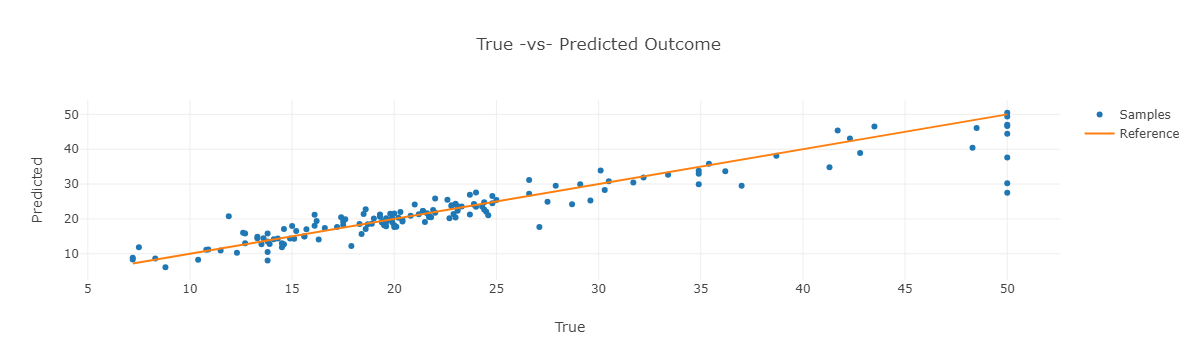

In [170]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test_pred,
    mode="markers",
    name="Samples"
))
fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_test.values,
    mode="lines",
    name="Reference"
))
fig.update_layout(title="True -vs- Predicted Outcome", xaxis_title="True", yaxis_title="Predicted", template="none")